In [1]:
import psi4
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg as splinalg
import time

## What factors limit the accuracy of the Hartree-Fock Method?

Hartree-Fock theory is able to successfully capture ca. 95% of the true energy (or our best approximation of it) for almost all systems. Most chemical predictions, however, require the remainder to be accurate. 


### Pre-experiment Questions: Part One

1. Write the electron configuration you would expect for H$_2$ in terms of $\sigma$ and $\sigma^*$ orbitals in the ground-state. Is this state a singlet or triplet? <br><br>

2. Propose at least two different excited-state electron configurations for H$_2$. <br><br>

3. Propose which excited-state configuration would be the lowest energy excited state (i.e., the first excited state). Is this state a singlet or triplet? <br><br>

4. How do you expect the energy gap between the ground and first-excited states to change as a function of $r_{AB}$? <br><br>

5. In the limit $r_{AB}\rightarrow\infty$, will you observe a difference in the energy of ground and first-excited states? Why or why not? <br><br>

6. Based on the energy of a single, isolated H-atom in Hartrees, what energy should the H$_2$ calculation converge to as $r_{AB}$ increases?

### Experiment: Part One

A. As a class, decide an approximate range of $r_{AB}$ in atomic units and assign a different basis set to each team. 

B. Use the following code to create an H$_2$ molecule and assign a list of $r_{AB}$ values in atomic units.

In [2]:
# singlet H2 has a charge of 0, spin multiplicity of 1 
h2_singlet = """
0 1
H 
H 1 **R**
"""

rAB = [0.4, 0.45, 0.5, 0.6, 0.75, 1, 1.2, 1.5, 2, 3, 4, 5, 6] 
                           
print(rAB)

[0.4, 0.45, 0.5, 0.6, 0.75, 1, 1.2, 1.5, 2, 3, 4, 5, 6]


C. Use the following code to compute the HF energy of H$_2$ for your assigned basis set at each value of $r_{AB}$. Use this plot to adjust the the values of $r_{AB}$ above in order to best capture the potential energy surface (PES).

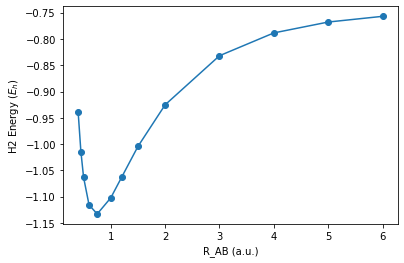

In [3]:
# basis set
basis = 'cc-pvtz'

# method
method = 'SCF'

# set computation options
psi4.set_options({'basis': basis,
                  'reference': 'rohf'})

mol_singlet = [psi4.geometry(h2_singlet.replace("**R**", str(r))) for r in rAB] 

HF_singlet = [psi4.energy(method, molecule=mol) for mol in mol_singlet]

psi4.core.clean()

plt.plot(rAB, HF_singlet, linestyle='-', marker='o') 
plt.xlabel('R_AB (a.u.)')
plt.ylabel('H2 Energy ($E_h$)')
plt.show()

D. Add code below to calculate the HF energies for the first excited state of H$_2$ based on parts B & C above. Create a single plot of the PES of both the singlet and triplet states.

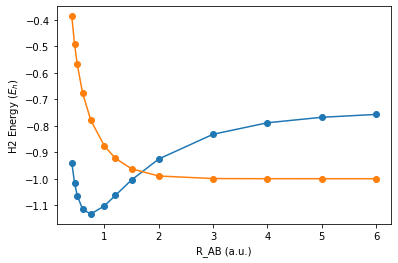

In [4]:
# <add code>

h2_triplet = """
0 3
H 
H 1 **R**
"""

mol_triplet = [psi4.geometry(h2_triplet.replace("**R**", str(r))) for r in rAB] 

HF_triplet = [psi4.energy(method, molecule=mol) for mol in mol_triplet]

psi4.core.clean()

plt.plot(rAB, HF_singlet, rAB, HF_triplet, linestyle='-', marker='o') 
plt.xlabel('R_AB (a.u.)')
plt.ylabel('H2 Energy ($E_h$)')
plt.show()

E. Use the following code to compute the lowest, equilibrium energy and corresponding value of $r_{AB}$ for H$_2$. Confirm that this result is consistent with the PES above.

In [5]:
h2 = psi4.geometry(h2_singlet.replace("**R**", '1.0')) 
E_min = psi4.optimize(method, molecule=h2)

Rab_min = h2.z(1)-h2.z(0)      # units angstroms
Rab_min = Rab_min*0.5291772    # atomic units

psi4.core.clean()

print(f"The lowest Hartree-Fock energy of H2 is: {E_min} Eh at {Rab_min} a.u")

Optimizer: Optimization complete!
The lowest Hartree-Fock energy of H2 is: -1.132990267179331 Eh at 0.7343712946919878 a.u


### Thinking about the data: Part One

7. As a class, decide whether each of the following results depends on the basis set: <br><br> a) the equilibrium bond length of H$_2$ <br><br> b) the multiplicity of the lowest energy state at this distance <br><br> c) the multiplicity of the lowest energy state as $r_{AB}\rightarrow\infty$ <br><br>

8. Based on your pre-experiment predictions: <br><br> a) which state (singlet or triplet) converges to the correct energy <br><br> b) in what way(s) does HF theory fail to accurately predict the PES of H$_2$ <br><br>

9. Ignoring spin and assuming each electron can be associated with one nucleus or the other, describe four possible arrangements of electrons, $e_1$ and $e_2$, with the nuclei, H$_A$ and H$_B$. <br><br>

10. Assuming all four possible arrangements are equally likely: <br><br> a) what is the probability of only $e_1$ being associated with H$_A$? <br><br> b) what is the probability of only $e_2$ being associated with H$_A$? <br><br> c) what is the probability that H$_A$ has only one electron, $p($H$_A$.)? <br><br> d) what is the probability that H$_A$ has two electrons, $p($H$_A$:)? <br><br> e) what is the probability that H$_A$ has no electrons, $p($H$_A$)? <br><br> 

11. Which arrangement(s) become less likely as $r_{AB}\rightarrow\infty$? Explain your reasoning.

### Information
#### Table 1: Probabilities of an electron associated with a particular nucleus 

| config  | case 1 |case 2 | case 3
|---|---|---|---|
|p(H$_A$:)| 1/4 |0| 1/2
|p(H$_A$.)| 1/2 |1| 0
|p(H$_A$) | 1/4 |0| 1/2
|p(H$_B$:)| 1/4 |0| 1/2
|p(H$_B$.)| 1/2 |1| 0
|p(H$_B$) | 1/4 |0| 1/2

12. What was the assumption that led to the probabilities in case 1? (Hint: recall question 10)<br><br>

13. For case 2: <br><br> a) what is the likelihood of finding both electrons associated with H$_A$? <br><br> b) if electron 1 is associated with H$_A$, where is electron 2? <br><br>

14. Describe the assumptions leading to the probabilities in case 2.<br><br>

15. Describe the assumptions leading to the probabilities in case 3.<br><br>

16. Which of the three cases assumes the locations of the electrons are correlated? <br><br>

17. Which of the three cases best matches your team's prediction for an H$_2$ molecule:<br><br> a) near equilibrium bond distances <br><br> b) near bond breaking distances <br><br>

18. In view of your team's answers above, what property of electrons is essential to include to calculate an accurate bond dissociation energy for H$_2$? Explain.

### Information

Recall the bonding and antibonding MOs from 1s atomic orbitals 

$$
\sigma(r) = \sqrt{\frac{1}{2}}[\phi_{1s_A}(r) +\phi_{1s_B}(r)] \qquad\text{(1)}
$$ 
and
$$
\sigma^*(r) = \sqrt{\frac{1}{2}}[\phi_{1s_A}(r) -\phi_{1s_B}(r)]. \quad\text{ (2)}
$$

The HF wavefunction, for the closed-shell singlet electron configuration, $\sigma^2\sigma^{*0}$, is represented as a single Slater determinant

$$
\psi_1 = 
\left|\begin{array}{cc}\sigma(1)\alpha(1) & \sigma(1)\beta(1)\\
\sigma(2)\alpha(2) & \sigma(2)\beta(2)
\end{array}
\right| \qquad \quad(\text{3})
$$

where the  notation $\sigma(1)$ is short-hand for the coordinates of electron 1, i.e. $\sigma(1)\equiv\sigma(r_1).$

### Pre-experiment Questions: Part Two

19. Confirm that the Slater determinant expands to:
$\psi_1 = \sigma(1)\sigma(2)[\alpha(1)\beta(2) - \alpha(2)\beta(1)]$
<br><br>

20. Recall, each molecular wavefunction contains both a spatial and spin component. In view of your answer above, write the spatial function for the ground state of H$_2$. <br><br>

21. Write a Slater determinant representing the excited state $\psi_2$ resulting from a double excitation $\sigma^0\sigma^{*2}$. <br><br>

22. Write the spatial function for this doubly excited state of H$_2$.<br><br>

23. In view of your answers above, describe any similarites in the notation of the spatial function and the electron configuration. <br><br>

24. Explain why there is more than one way to represent an excited state resulting from a single excitation, and propose two potential spatial functions corresponding to the electron configuration $\sigma^1\sigma^{*1}$. (Note: we will return to this in part 4.)

### Experiment: Part Two

A. Excute the following code that defines the functions used to calculate the wavefunctions.

In [6]:
def phi1s(x,rN):
    # an unnormalized 1s orbital 
    return np.exp(-np.abs(x-rN))

def mo(x,rnuc,c):
    rA = -rnuc/2
    rB = rnuc/2
    cA = c[0]
    cB = c[1]
    out = cA*phi1s(x,rA)+cB*phi1s(x,rB)
    norm = np.sqrt(np.sum(out**2))
    return out/norm

# coefficients of the bonding and antibonding MOs
c_sigma = np.array([1,1])/np.sqrt(2)
c_sigma_star = np.array([1,-1])/np.sqrt(2)

B. Use the following code to assign the value of $r_{AB}$ in atomic units and subsequent list of positions.

In [7]:
# assign positions of the nuclei 
bond = Rab_min   # note: replace Rab_min with a different value when instructed  

# values corresponding to the coordinate r 
npt = int(bond/4*1000)
r = np.array([i for i in range(-npt,npt+1)])*.01
r1, r2 = np.meshgrid(r,r)

C. Use the following code to construct and plot the one-electron MOs $\sigma(1)$ and $\sigma^*(1)$ as a function of the coordinate $r_1$.

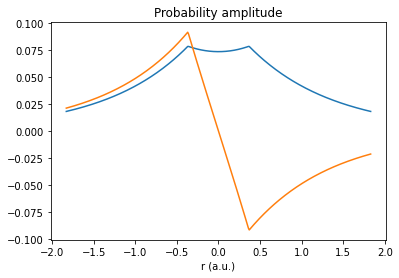

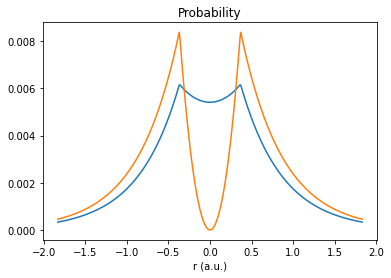

In [8]:
# evaluate and plot the bonding and antibonding MOs at each value of r
sigma = mo(r,bond,c_sigma)
sigma_star = mo(r,bond,c_sigma_star)

plt.plot(r,sigma,r,sigma_star)
plt.title('Probability amplitude')
plt.xlabel('r (a.u.)')
plt.show()

plt.plot(r,sigma**2,r,sigma_star**2)
plt.title('Probability')
plt.xlabel('r (a.u.)')
plt.show()

D. Use the following code to plot the spatial part of the ground state two-electron wavefunction $\sigma(1)\sigma(2)$ as a function of coordinates $r_1$ and $r_2$ in a two-dimensional contour plot.

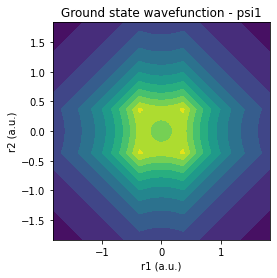

In [9]:
psi1 = mo(r1,bond,c_sigma)*mo(r2,bond,c_sigma)

# plot the wavefunction 
n_levels = 10
plt.contourf(r1,r2,psi1,n_levels)
plt.title('Ground state wavefunction - psi1')
plt.axis('square')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.show()

E. Add code below to plot the spatial part of the doubly excited two-electron wavefunction $\sigma^*(1)\sigma^*(2)$ as a function of coordinates $r_1$ and $r_2$ in a two-dimensional contour plot.

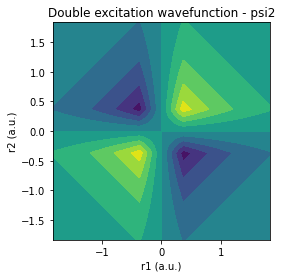

In [10]:
# <add code>

psi2 = mo(r1,bond,c_sigma_star)*mo(r2,bond,c_sigma_star)

# plot the wavefunction 
n_levels = 10
plt.contourf(r1,r2,psi2,n_levels)
plt.title('Double excitation wavefunction - psi2')
plt.axis('square')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.show()

F. Add code below to plot two potential spatial functions resulting from a single excitation. (Note: be sure not to use `psi4` as a variable name)

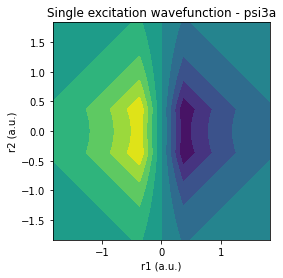

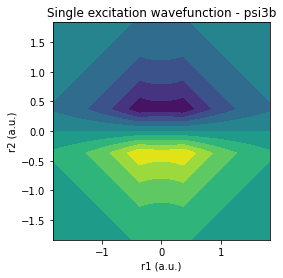

In [11]:
# <add code>

psi3a = mo(r1,bond,c_sigma_star)*mo(r2,bond,c_sigma)
psi3b = mo(r1,bond,c_sigma)*mo(r2,bond,c_sigma_star)

# plot the wavefunction 
n_levels = 10
plt.contourf(r1,r2,psi3a,n_levels)
plt.title('Single excitation wavefunction - psi3a')
plt.axis('square')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.show()

plt.contourf(r1,r2,psi3b,n_levels)
plt.title('Single excitation wavefunction - psi3b')
plt.axis('square')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.show()

### Thinking about the data: Part Two

26. In reference to the plots of the one-electron MOs: <br><br> a) Identify the positions of nucleus A and nucleus B.<br><br> b) Label each curve as either $\sigma$ or $\sigma^*$ and explain your reasoning. <br><br> c) Identify the bond length and explain how this result is consistent with the PES from part one. <br><br>

27. In reference to the contour plot of the two-electron ground state wavefunction: <br><br> a) Are there any nodes associated with this wavefunction? <br><br> b) Identify all possible positions of $e_2$ assuming $e_1$ is located on nucleus A. <br><br> c) Identify all possible positions of $e_1$ assuming $e_2$ located on nucleus A. <br><br> d) In which quadrant of the graph are both $e_1$ and $e_2$ associated with nucleus A? <br><br>

28. In reference to the contour plot of the doubly excited state wavefunction: <br><br> a) Identify the number of nodes associated with this wavefunction. <br><br> b) Is there a possibility that both $e_1$ and $e_2$ are associated with nucleus A? Explain.<br><br>

29. In reference to the contour plots of a singly excited state wavefunction: <br><br> a) Identify the number of nodes associated with the wavefunction. <br><br> b) Explain how it is possible to determine whether the $\sigma$ MO is associated with $e_1$ or $e_2$. <br><br> c) Is there a possibility that both $e_1$ and $e_2$ are associated with nucleus A? <br><br>

30. Identify which of the three cases presented in Table 1 best represents the probabilities of the two-electron ground state wavefunction at the equilibrium bond length.<br><br> 

31. Increase the distance between the nuclei by assigning a value to `bond` > Rab_min and re-evaluate the spatial part of the two-electron wavefunctions. Do any of your answers above depend on the value of $r_{AB}$? <br><br> 

32. In view Question 18 and the plot of the two-electron ground state wavefunction, what is the reason Hartree-Fock theory is unable to accurately model the ground state of H$_2$ as $r_{AB}\rightarrow\infty$? <br><br> 

33. Now, let's look at the resulting two-particle wavefunctions from the linear combination of two determinants. Add code below to plot both the addition and subtraction of the ground and doubly excited state.
$$
\psi_\pm = \psi_1\pm\psi_2
$$

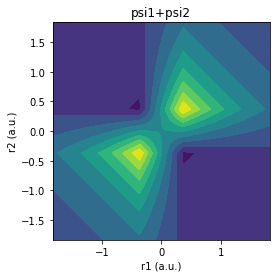

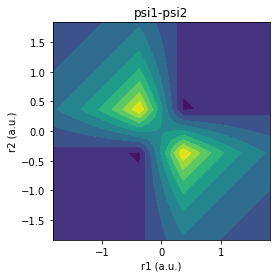

In [12]:
# <add code>

plt.contourf(r1,r2,psi1+psi2,n_levels)
plt.title('psi1+psi2')
plt.axis('square')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.show()

plt.contourf(r1,r2,psi1-psi2,n_levels)
plt.title('psi1-psi2')
plt.axis('square')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.show()

34. Are there any nodes associated with these wavefunctions? <br><br> 

35. For $\psi_+$, if $e_1$ is on nucleus A, where is $e_2$ most likely to be found? <br><br> 

36. For $\psi_-$, if $e_1$ is on nucleus A, where is $e_2$ **not** likely to be found? <br><br> 

37. For each wavefunction, identify which of the three cases presented in Table 1 best represents the probabilities of the two electrons: <br><br> a) $\psi_+$ <br><br> b) $\psi_-$ <br><br>

38. In your own words, explain how the addition of multiple determinants could improve the accuracy of the Hartree Fock description of the ground state of H$_2$.

### Information

Configuration interaction (CI) calculations treat the wavefunction as a combination of multiple (sometimes very many!) determinants. The first determinant is assumed to be the HF ground state, followed by successive excited states. The wavefunction is constructed as a linear combination of the determinants and the variational principle is used to find the lowest energy. For example, mixing configurations of the ground state (Hartree-Fock) single determinant with the doubly excited determinant is called CI doubles, or CID.

$$
\psi_\textrm{CID} = c_1\psi_1 + c_2\psi_2 \qquad(\text{4})
$$

Additional determinants from single excitations give CISD. Adding triple excitations makes CISDT, quadruples give CISDTQ, and so forth. For H$_2$ in a minimal basis, only single and double excitations are possible because there are only two electrons.

### Experiment: Part Three

A. Use the following code to compute the CISD energy of H$_2$ for the same values of $r_{AB}$ used in the HF calculation. 

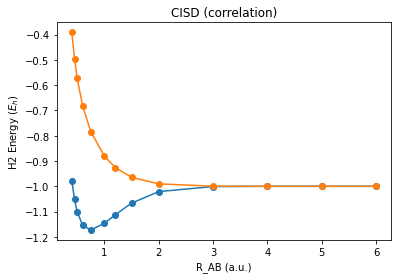

In [13]:
method = 'cisd'

CISD_singlet = [psi4.energy(method, molecule=mol) for mol in mol_singlet]
CISD_triplet = [psi4.energy(method, molecule=mol) for mol in mol_triplet]

plt.title('CISD (correlation)')
plt.plot(rAB, CISD_singlet, rAB, CISD_triplet, linestyle='-', marker='o') 
plt.xlabel('R_AB (a.u.)')
plt.ylabel('H2 Energy ($E_h$)')
plt.show()

B. Use the following code to compute the lowest CISD energy of H$_2$ and the corresponding value of $r_{AB}$.

In [14]:
h2 = psi4.geometry(h2_singlet.replace("**R**", '1.0')) 
E_min = psi4.optimize(method, molecule=h2)

Rab_min = h2.z(1)-h2.z(0)      # units angstroms
Rab_min = Rab_min*0.5291772    # atomic units

psi4.core.clean()

print(f"The lowest CISD energy of H2 is: {E_min} Eh at {Rab_min} a.u")

Performing finite difference calculations
 3 displacements needed ... 1 2 3
 3 displacements needed ... 1 2 3
 3 displacements needed ... 1 2 3
 3 displacements needed ... 1 2 3
 3 displacements needed ... 1 2 3
 3 displacements needed ... 1 2 3
Optimizer: Optimization complete!
The lowest CISD energy of H2 is: -1.1723366652045275 Eh at 0.7424424037219709 a.u


C. Add code below to create a single plot of both the HF and CISD H$_2$ ground state PES.

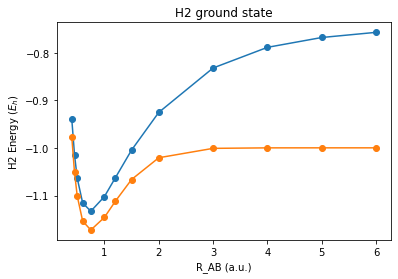

In [15]:
# <add code>

plt.title('H2 ground state')
plt.plot(rAB, HF_singlet, rAB, CISD_singlet, linestyle='-', marker='o') 
plt.xlabel('R_AB (a.u.)')
plt.ylabel('H2 Energy ($E_h$)')
plt.show()

D. Add code below to create a single plot of both the HF and CISD H$_2$ first excited state PES.

Text(0, 0.5, 'H2 Energy ($E_h$)')

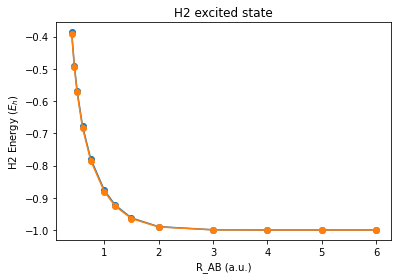

In [16]:
# <add code>

plt.title('H2 excited state')
plt.plot(rAB, HF_triplet, rAB, CISD_triplet, linestyle='-', marker='o') 
plt.xlabel('R_AB (a.u.)')
plt.ylabel('H2 Energy ($E_h$)')

E. Use the following code to compute the coefficents $c_1$ and $c_2$ corresponding to the ground and doubly excited states, respectively. In the table below, record the results for at least four different values of $r_{AB}$. Be sure to include distances both near the minimum and near dissociation.

In [17]:
# Edit the value of R_AB
R_AB = Rab_min

# Code to compute the coefficients 
R_AB = str(R_AB)
psi4.core.set_output_file('output.dat', False)
h2 = psi4.geometry(h2_singlet.replace("**R**", R_AB)) # Edit this
E_min = psi4.energy('CISD/sto-3g', molecule=h2)
with open('output.dat') as f:
    file = [line.split() for line in f if line.strip().startswith('*')] 
    coeff = [file[3][2], file[4][2]]
print(F'c1 = {coeff[0]} c2 = {coeff[1]}')

c1 = -0.993591 c2 = 0.113039


#### Table 1: CISD coefficients as a function of  Rab
| Rab  | c_1 |c_2|
|---|---|---|
| Rab_min |-0.993591 |0.113039 |
| 1 |-0.984514 |0.175308  |
| 3 |0.733106 |-0.680115 |
| 6 |-0.707120|0.707094 |

### Thinking about the data: Part Three

39. As a class, decide whether each of the following CISD results depends on the basis set: <br><br> a) the equilibrium bond length of H$_2$ <br><br> b) the multiplicity of the lowest energy state at this distance <br><br> c) the multiplicity of the lowest energy state as $r_{AB}\rightarrow\infty$ <br><br>

40. Compare the lowest ground state CISD energy to the HF calculation. <br><br> a) What is the energy difference in units of kcal/mol? (Hint: 1 Ha = 627.509 kcal mol$^{-1}$.) <br><br> b) Which energy is more correct? Why? <br><br> c) As a class, determine how this result depends on the basis set. <br><br>

41. Compare the ground state CISD PES to the HF calculation as $r_{AB}\rightarrow\infty$. Which is more correct? Why? <br><br>

42. Based on the weights of the coefficients, rationalize the relative success of HF near the equilibrium bond length. <br><br>

43. Compare the first excited state CISD PES to the HF calculation. What potential explanation(s) might your team propose for this result? 

### Information

One important property of electrons is that they must be indistinguishable, i.e., interchanging two electrons should not change the state of the system. Thus, the spatial part of the first excited state wavefunction cannot be $\sigma(1)\sigma^*(2)$ or $\sigma(2)\sigma^*(1)$ since these two functions distinguish electrons 1 and 2. In order to satisfy indistinguishability, the spatial functions of the first excited state are represented as a linear combination of individual components. 

In addition, the total wavefunction must also be antisymmetric with respect to exchange. If the spatial part is symmetric, the spin part must be antisymmetric and vice versa. Thus, the four wavefunctions of H$_2$ corresponding to a single excitation are as follows: 

an open-shell singlet
$$
^0\psi = (\sigma(1)\sigma^*(2)+\sigma^*(1)\sigma(2))[\alpha(1)\beta(2)-\alpha(2)\beta(1)] 
$$
and three triplet states
\begin{align}
^3_1\psi &= (\sigma(1)\sigma^*(2)-\sigma^*(1)\sigma(2))\alpha(1)\alpha(2)\\ 
^3_0\psi &= (\sigma(1)\sigma^*(2)-\sigma^*(1)\sigma(2))[\alpha(1)\beta(2)+\alpha(2)\beta(1)] \\
^3_{-1}\psi &= (\sigma(1)\sigma^*(2)-\sigma^*(1)\sigma(2))\beta(1)\beta(2)
\end{align}

### Experiment: Part Four

A. Add code below to plot the spatial component of the open-shell singlet.

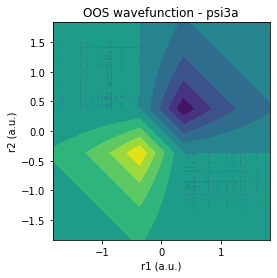

In [18]:
# <add code>

psiOOS = mo(r1,bond,c_sigma)*mo(r2,bond,c_sigma_star)+mo(r1,bond,c_sigma_star)*mo(r2,bond,c_sigma)

# plot the wavefunction 
n_levels = 10
plt.contourf(r1,r2,psiOOS,n_levels)
plt.title('OOS wavefunction - psi3a')
plt.axis('square')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.show()


B. Add code below to plot the spatial component of the triplet state.

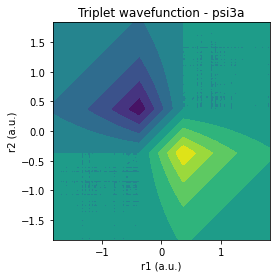

In [19]:
# <add code>

psitriplet = mo(r1,bond,c_sigma)*mo(r2,bond,c_sigma_star)-mo(r1,bond,c_sigma_star)*mo(r2,bond,c_sigma)

# plot the wavefunction 
n_levels = 10
plt.contourf(r1,r2,psitriplet,n_levels)
plt.title('Triplet wavefunction - psi3a')
plt.axis('square')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.show()

### Thinking about the data: Part Four

44. Are there any nodes associated with these wavefunctions? <br><br> 

45. For the open shell singlet, if $e_1$ is on nucleus A, where is $e_2$ most likely to be found? <br><br> 

46. For the triplet, if $e_1$ is on nucleus A, where is $e_2$ most likely to be found? <br><br>  

47. For each wavefunction, identify which of the three cases presented in Table 1 best represents the probabilities of the two electrons: <br><br> a) $^0\psi$ <br><br> b) $^3\psi$ <br><br>

48. In your own words, explain why HF theory is able to accurately describe the first excited state but not the ground state of H$_2$ as $r_{AB}\rightarrow\infty$.

### Information 
When electron configurations are separated in energy, then a single determinant often suffices to describe the wavefunction. This is the most common situation in closed shell molecules. Any time multiple electron configurations become close in energy, however, HF is in trouble. Multiple determinants become necessary to describe the important electron configurations. CI is the first of many theories that include these multiple configurations.

HF theory describes one kind of electron correlation exactly –– exchange correlation. The observation that electrons of the same spin avoid each other due to the antisymmetric nature of the spatial wavefunction, for example the $^3_1\psi$, is called a "Fermi hole." Because, for a triplet, the spins are identical, the spatial part of the wavefunction must have the minus sign, and the electrons cannot be in the same location. The HF triplet energy for H$_2$ is essentially correct because of this cancellation. Notice that the open-shell singlet tends to pair the electrons in the same region of space because the spatial wavefunction must be symmetric with respect to exchange. This effect is called a "Fermi heap." 

The inclusion of multiple determinants allow electronic structure theories to introduce correlation between electrons that is not present in HF MO theory. The additional electron correlation allows better descriptions of energies and geometries reaching chemical accuracy.